In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import requests
import time
import gmaps
import json
from config import gkey

There are two versions of this dataset: scrubbed and complete. The complete data includes entries where the location of the sighting was not found or blank (0.8146%) or have an erroneous or blank time (8.0237%). Since the reports date back to the 20th century, some older data might be obscured. Data contains city, state, time, description, and duration of each sighting.

In [2]:
# Read csv and store it in a dataframe
csvpath = 'Resources/scrubbed.csv'
ufo_df = pd.read_csv(csvpath, low_memory=False)
ufo_df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [3]:
ufo_df.tail()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
80327,9/9/2013 21:15,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658333,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136111,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972222,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011111,-77.265556
80331,9/9/2013 23:00,edmond,ok,us,cigar,1020,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White...,9/30/2013,35.6527778,-97.477778


In [4]:
ufo_df.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude '],
      dtype='object')

In [5]:
ufo_df = ufo_df.rename(columns={'longitude ': 'longitude'})
ufo_df.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude'],
      dtype='object')

In [6]:
ufo_df.count()
# Looks like we have to clean our data first

datetime                80332
city                    80332
state                   74535
country                 70662
shape                   78400
duration (seconds)      80332
duration (hours/min)    80332
comments                80317
date posted             80332
latitude                80332
longitude               80332
dtype: int64

In [7]:
# We use comman .isnull() to find how many entries have no data on them
ufo_df.isnull().sum()

datetime                   0
city                       0
state                   5797
country                 9670
shape                   1932
duration (seconds)         0
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
dtype: int64

In [8]:
clean_ufo_df = ufo_df.dropna().reset_index()
clean_ufo_df.head()

,index,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
2,4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
3,5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889
4,7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333


In [9]:
clean_ufo_df.count()

index                   66516
datetime                66516
city                    66516
state                   66516
country                 66516
shape                   66516
duration (seconds)      66516
duration (hours/min)    66516
comments                66516
date posted             66516
latitude                66516
longitude               66516
dtype: int64

In [10]:
new_ufo_df = clean_ufo_df.loc[:,['datetime','city','state','country', 'shape', \
                                 'duration (seconds)','latitude','longitude']]
new_ufo_df.head()

,datetime,city,state,country,shape,duration (seconds),latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,29.8830556,-97.941111
1,10/10/1956 21:00,edna,tx,us,circle,20,28.9783333,-96.645833
2,10/10/1960 20:00,kaneohe,hi,us,light,900,21.4180556,-157.803611
3,10/10/1961 19:00,bristol,tn,us,sphere,300,36.5950000,-82.188889
4,10/10/1965 23:45,norwalk,ct,us,disk,1200,41.1175000,-73.408333


In [11]:
# Change 24:00 to 00:00 instead
ufo_date = new_ufo_df.datetime.str.replace('24:00', '00:00')  
ufo_date = pd.to_datetime(ufo_date, format='%m/%d/%Y %H:%M')  
# Reformat the datetime column
new_ufo_df['datetime'] = new_ufo_df.datetime.str.replace('24:00', '00:00')
new_ufo_df['datetime'] = pd.to_datetime(new_ufo_df['datetime'], format='%m/%d/%Y %H:%M')

new_ufo_df['latitude'] = pd.to_numeric(new_ufo_df['latitude'])
new_ufo_df['longitude'] = pd.to_numeric(new_ufo_df['longitude'])
new_ufo_df['datetime'] = new_ufo_df['datetime'].astype(str)
new_ufo_df.dtypes

datetime               object
city                   object
state                  object
country                object
shape                  object
duration (seconds)     object
latitude              float64
longitude             float64
dtype: object

In [12]:
new_ufo_df.head()

,datetime,city,state,country,shape,duration (seconds),latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,29.883056,-97.941111
1,1956-10-10 21:00:00,edna,tx,us,circle,20,28.978333,-96.645833
2,1960-10-10 20:00:00,kaneohe,hi,us,light,900,21.418056,-157.803611
3,1961-10-10 19:00:00,bristol,tn,us,sphere,300,36.595000,-82.188889
4,1965-10-10 23:45:00,norwalk,ct,us,disk,1200,41.117500,-73.408333


In [13]:
new = new_ufo_df["datetime"].str.split("-", n = 1, expand = True) 
  
# making separate first name column from new data frame 
new_ufo_df["year"]= new[0] 
  
# making separate last name column from new data frame 
new_ufo_df["date_time"]= new[1] 
  
# Dropping old Name columns 
new_ufo_df.drop(columns =["datetime"], inplace = True) 
  
# df display 
new_ufo_df.head() 

,city,state,country,shape,duration (seconds),latitude,longitude,year,date_time
0,san marcos,tx,us,cylinder,2700,29.883056,-97.941111,1949,10-10 20:30:00
1,edna,tx,us,circle,20,28.978333,-96.645833,1956,10-10 21:00:00
2,kaneohe,hi,us,light,900,21.418056,-157.803611,1960,10-10 20:00:00
3,bristol,tn,us,sphere,300,36.595000,-82.188889,1961,10-10 19:00:00
4,norwalk,ct,us,disk,1200,41.117500,-73.408333,1965,10-10 23:45:00


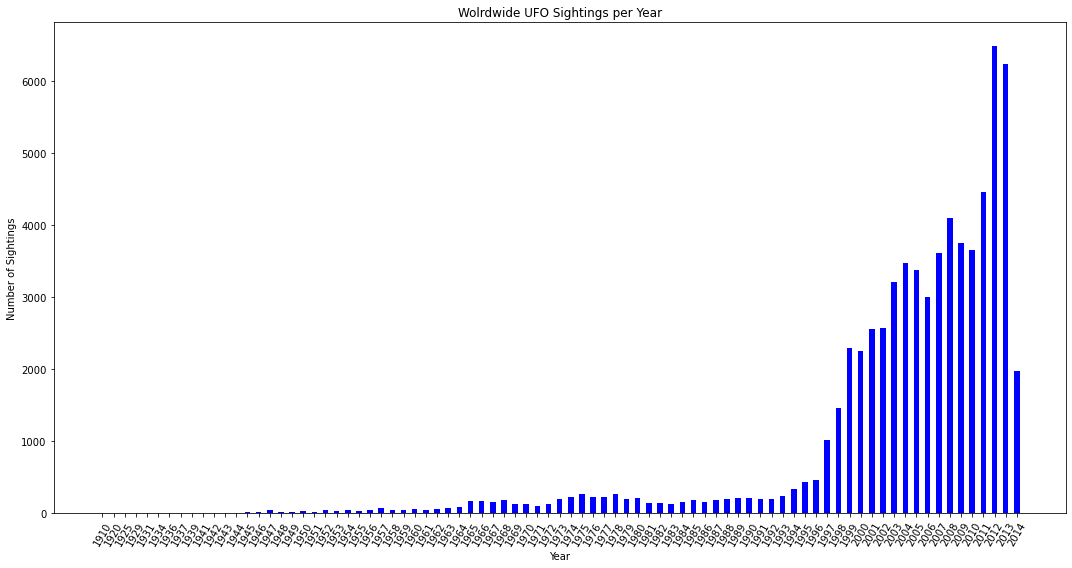

,city
year,
1910,2
1920,1
1925,1
1929,1
1931,2
...,...
2010,3645
2011,4456
2012,6489


In [14]:
years = new_ufo_df.groupby("year")
counts = pd.DataFrame(years['city'].count())
x_axis = np.arange(len(counts))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(15,8))
plt.bar(x_axis, counts["city"], color='blue', align="center", width=0.50)
plt.xticks(tick_locations, list(counts.index), rotation=60)

# Set title and lablels
plt.title("Wolrdwide UFO Sightings per Year")
plt.xlabel("Year")
plt.ylabel("Number of Sightings")
plt.tight_layout()
# Save figure
plt.savefig("Images/World_UFO_Sights.png")
plt.show()
counts

Note: UFO Sighting records ended in the middle of 2014.

In [15]:
countries = new_ufo_df.groupby("country")
countries_count = pd.DataFrame(countries["country"].count())
countries_count = countries_count.rename(columns={'country': 'Number of Countries'})
countries_count

,Number of Countries
country,
au,10
ca,2942
gb,11
us,63553


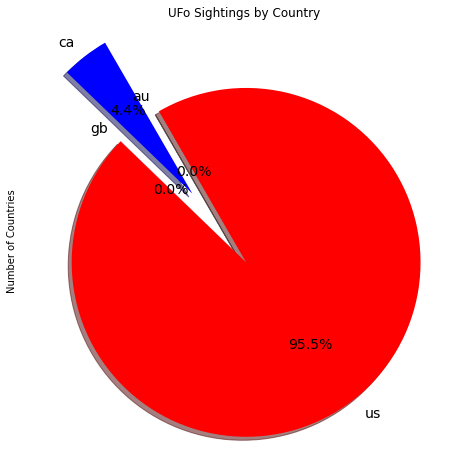

In [16]:
# Lets make a pie chart
explode = (0, 0.5, 0, 0)
countries_count.plot(kind='pie', y='Number of Countries', title='UFo Sightings by Country',
                     autopct='%1.1f%%', fontsize=14, shadow=True, colors=['aqua','blue','purple','red'],
                     startangle=120, legend=False, figsize=(8,8), explode=explode)
plt.axis('equal')
# Save figure
plt.savefig("Images/UFO_Sights_Country.png")
plt.show()

In [17]:
usa_sights = new_ufo_df.loc[new_ufo_df['country'] == 'us']
usa_sights.head()

,city,state,country,shape,duration (seconds),latitude,longitude,year,date_time
0,san marcos,tx,us,cylinder,2700,29.883056,-97.941111,1949,10-10 20:30:00
1,edna,tx,us,circle,20,28.978333,-96.645833,1956,10-10 21:00:00
2,kaneohe,hi,us,light,900,21.418056,-157.803611,1960,10-10 20:00:00
3,bristol,tn,us,sphere,300,36.595000,-82.188889,1961,10-10 19:00:00
4,norwalk,ct,us,disk,1200,41.117500,-73.408333,1965,10-10 23:45:00


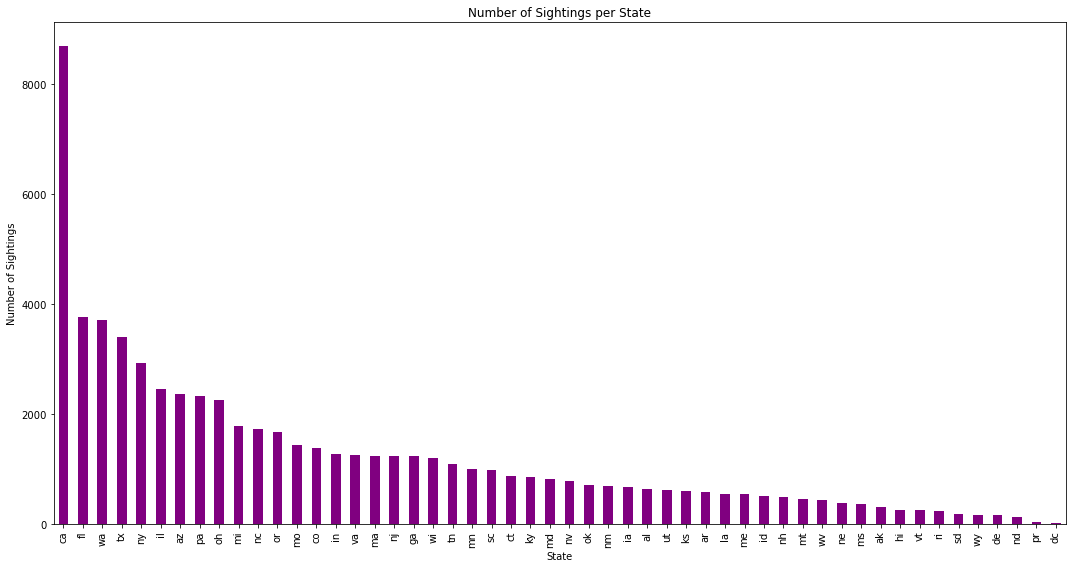

,Number of Sightings
state,
ca,8683
fl,3754
wa,3707
tx,3398
ny,2915
il,2447
az,2362
pa,2319
oh,2251


In [18]:
state_groups = usa_sights.groupby("state")
state_counts = pd.DataFrame(state_groups['state'].count().sort_values(ascending=False))
bar_plot = state_counts.plot(kind='bar', title='Number of Sightings per State', color='purple', figsize=(15,8),\
                             legend=None)
# Set x and y labels
bar_plot.set_xlabel('State')
bar_plot.set_ylabel('Number of Sightings')
plt.tight_layout()
# Save figure
plt.savefig("Images/Sights_State.png")
plt.show()
state_counts = state_counts.rename(columns={'state': 'Number of Sightings'})
state_counts.sort_values(by='Number of Sightings', ascending=False)

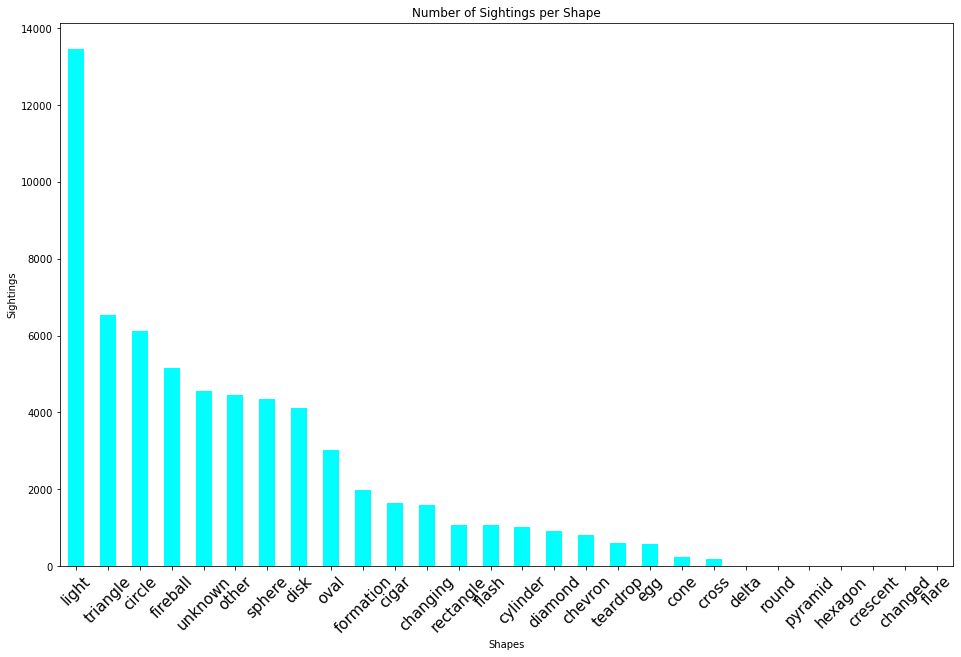

,Number of Sightings
shape,
light,13471
triangle,6548
circle,6117
fireball,5148
unknown,4567
other,4466
sphere,4346
disk,4121
oval,3030


In [19]:
usa_sights['shape'].value_counts().plot(kind='bar', figsize=(16,10), color='aqua')
plt.xticks(rotation=45, fontsize=15)
plt.title("Number of Sightings per Shape")
plt.xlabel("Shapes")
plt.ylabel("Sightings")
plt.savefig("Images/Sights_Shape.png")
plt.show()
# usa_sights['shape'].value_counts()
shape_groups = usa_sights.groupby("shape")
shape_counts = pd.DataFrame(shape_groups['shape'].count())
shape_counts = shape_counts.rename(columns={'shape': 'Number of Sightings'})
shape_counts.sort_values(by='Number of Sightings', ascending=False)

In [20]:
gmaps.configure(api_key=gkey)

In [21]:
usa_sights['sightings'] = '1'
usa_sights.to_csv('Resources/usa_sights.csv')
usa_sights.head()

C:\Users\JORMIL\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,city,state,country,shape,duration (seconds),latitude,longitude,year,date_time,sightings
0,san marcos,tx,us,cylinder,2700,29.883056,-97.941111,1949,10-10 20:30:00,1
1,edna,tx,us,circle,20,28.978333,-96.645833,1956,10-10 21:00:00,1
2,kaneohe,hi,us,light,900,21.418056,-157.803611,1960,10-10 20:00:00,1
3,bristol,tn,us,sphere,300,36.595000,-82.188889,1961,10-10 19:00:00,1
4,norwalk,ct,us,disk,1200,41.117500,-73.408333,1965,10-10 23:45:00,1


In [22]:
locations = usa_sights[["latitude", "longitude"]]
counts = usa_sights['sightings'].astype(float)
fig = gmaps.figure(center=(40.0, -85.0), zoom_level=4)

heatmap_layer = gmaps.heatmap_layer(locations,dissipating = False,\
                                    max_intensity=np.max(counts), point_radius=0.05, weights=counts)
fig.add_layer(heatmap_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [23]:
def conv_season(x):
    x = int(x.split("-")[0])
    
    if x in range(3,6):
        return "Spring"
    if x in range(6,9):
        return "Summer"
    if x in range(9,12):
        return "Autumn"
    if x == 12 or x == 1 or x == 2:
        return "Winter"

usa_sights["Season"] = usa_sights['date_time'].apply(conv_season)
usa_sights.sample(10)

C:\Users\JORMIL\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,city,state,country,shape,duration (seconds),latitude,longitude,year,date_time,sightings,Season
11743,ogunquit,me,us,sphere,1,43.248889,-70.599722,1998,11-03 20:13:00,1,Autumn
28978,mccaysville,ga,us,light,900,34.986111,-84.371389,2012,03-05 22:00:00,1,Spring
18375,baltimore,md,us,triangle,60,39.290278,-76.612500,2007,01-23 12:00:00,1,Winter
51463,colorado springs,co,us,disk,180,38.833889,-104.820833,2011,07-04 21:30:00,1,Summer
60983,edwardsville,il,us,fireball,600,38.811389,-89.953056,2012,09-01 21:00:00,1,Autumn
11616,cumming,ga,us,circle,2,34.207222,-84.140278,1999,11-30 22:00:00,1,Autumn
20348,simi valley,ca,us,unknown,540,34.269444,-118.780556,2007,01-03 22:38:00,1,Winter
46542,emerald isle,nc,us,circle,5,34.677778,-76.951111,2011,07-14 21:15:00,1,Summer
7902,bedford heights,oh,us,oval,900,41.416944,-81.527500,1976,11-15 23:00:00,1,Autumn
60979,lincoln,ca,us,light,1200,38.891667,-121.291944,2012,09-01 20:15:00,1,Autumn


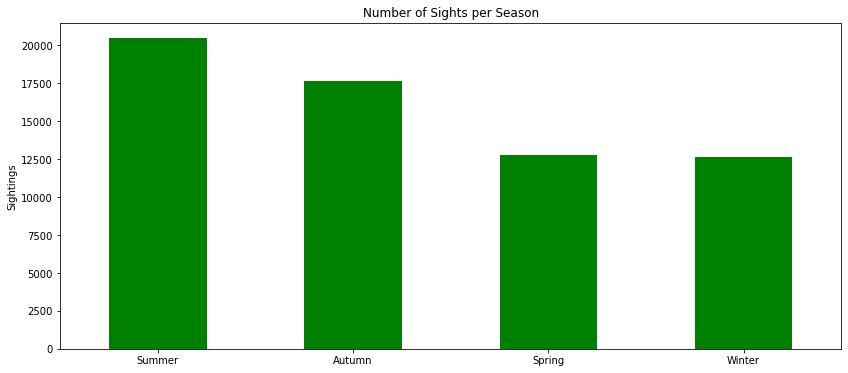

,Number of Sightings
Season,
Summer,20483
Autumn,17681
Spring,12750
Winter,12639


In [24]:
plt.subplots(figsize=(14,6))

usa_sights['Season'].value_counts().plot(kind='bar', color='green')
plt.ylabel("Sightings")
plt.xticks(rotation=0)
plt.title("Number of Sights per Season")
plt.savefig("Images/Sights_Season.png")
plt.show()
season_groups = usa_sights.groupby("Season")
season_counts = pd.DataFrame(season_groups['Season'].count())
season_counts = season_counts.rename(columns={'Season': 'Number of Sightings'})
season_counts.sort_values(by='Number of Sightings', ascending=False)

In [33]:
usa_sights.columns = usa_sights.columns.str.replace('[#,<,>]', '')

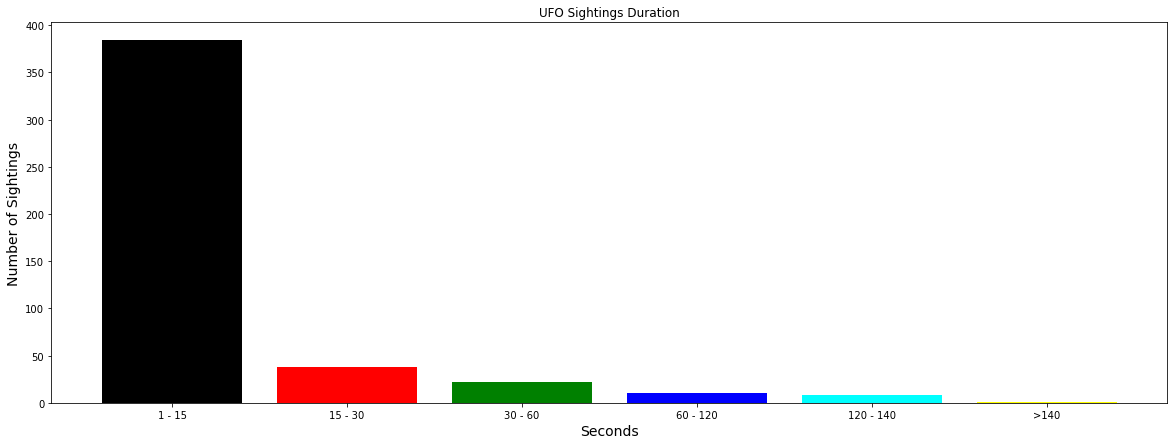

1 - 15       384
>140          38
15 - 30       22
30 - 60       10
60 - 120       8
120 - 140      1
dtype: int64


In [64]:
plt.subplots(figsize=(20,7))
duration_seconds = usa_sights["duration (seconds)"].value_counts()
dur_order = ["1 - 15","15 - 30", "30 - 60", "60 - 120","120 - 140", ">140" ]
duration_list=[]
for i in duration_seconds:
    if i in range(1,16):
        duration_list.append("1 - 15")
    if i in range(15,31):
        duration_list.append("15 - 30")
    if i in range(30,61):
        duration_list.append("30 - 60")
    if i in range(60,121):
        duration_list.append("60 - 120")
    if i in range(120,141):
        duration_list.append("120 - 140")
    if i > 140:
        duration_list.append(">140")

duration_list = pd.Series(duration_list)
duration_list = duration_list.value_counts()
duration = plt.bar(dur_order, duration_list, color=['black', 'red', 'green', 'blue', 'cyan', 'yellow'])
plt.xlabel("Seconds", size=14)
plt.ylabel("Number of Sightings", size=14)
plt.title("UFO Sightings Duration")
plt.savefig("Images/Sights_Duration.png")
plt.show()
print(duration_list)